In [ ]:
#Desc : This program uses an artificial recurrent neural network called Long Short Term Memory (LSTM)
#       to predict the closing stock price of a corporation using the past 60 day stock price

In [ ]:
#import lib
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
from pandas_datareader import data as pdr
plt.style.use('fivethirtyeight')
import yfinance as yfin
from datetime import datetime, date, timedelta

In [ ]:
#Get Stock Quote
yfin.pdr_override()
df = pdr.get_data_yahoo('NVDA', start='2012-01-01', end='2024-4-11')

df

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,3.575000,3.600000,3.502500,3.510000,3.219731,46804400
2012-01-04,3.512500,3.565000,3.480000,3.550000,3.256423,34737200
2012-01-05,3.532500,3.695000,3.517500,3.677500,3.373379,56354800
2012-01-06,3.675000,3.677500,3.592500,3.635000,3.334393,53325200
2012-01-09,3.637500,3.705000,3.610000,3.635000,3.334393,50824400
...,...,...,...,...,...,...
2024-04-04,904.059998,906.340027,858.799988,859.049988,859.049988,43496500
2024-04-05,868.659973,884.809998,859.260010,880.080017,880.080017,39885700
2024-04-08,887.000000,888.299988,867.320007,871.330017,871.330017,28322000


In [ ]:
df.shape

(3087, 6)

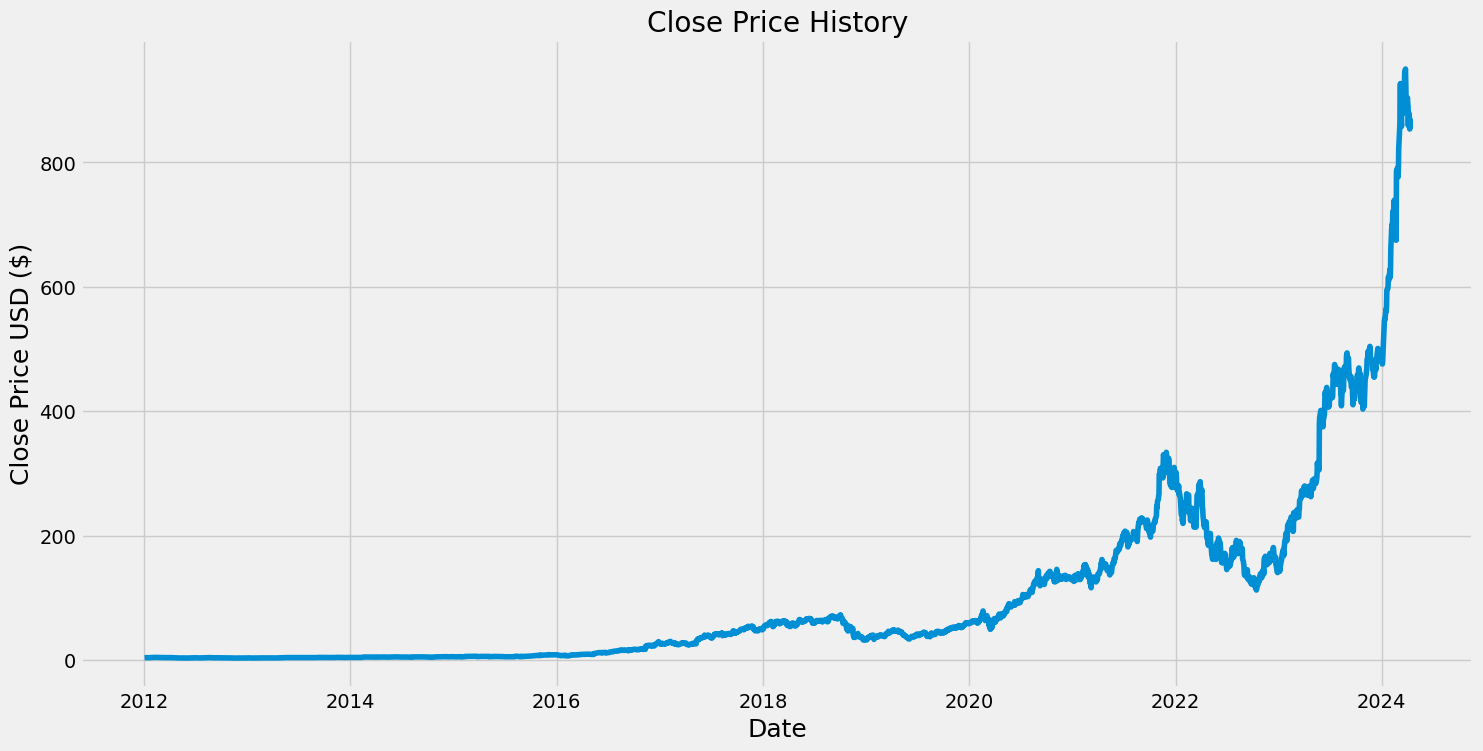

In [ ]:
#Visualize the closing price history
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()


In [ ]:
#Create new datafram with only close column
data = df.filter(['Close'])
#Convert data fram to numpy array
dataset = data.values
#Get the number of rows to train the model on
training_data_len = math.ceil(len(dataset) * .5 )

training_data_len


1544

In [ ]:
#Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[7.02087733e-04],
       [7.44318536e-04],
       [8.78929410e-04],
       ...,
       [9.16921371e-01],
       [8.98139162e-01],
       [9.15928943e-01]])

In [ ]:
#Create the training dataset
#Create scaled training dataset
train_data = scaled_data[0:training_data_len, :]
#split data to x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i,0])
  y_train.append(train_data[i, 0])
  if i<= 61 :
    print(x_train)
    print(y_train)
    print()


[array([0.00070209, 0.00074432, 0.00087893, 0.00083406, 0.00083406,
       0.00081822, 0.00074168, 0.00071792, 0.00062027, 0.00056484,
       0.00068625, 0.00078391, 0.0007496 , 0.00085254, 0.00093964,
       0.00091588, 0.00087893, 0.00093172, 0.00090268, 0.00089477,
       0.000937  , 0.0010848 , 0.00117191, 0.00114023, 0.00115079,
       0.00130124, 0.0012986 , 0.00119302, 0.00125901, 0.00128276,
       0.00126429, 0.00133819, 0.00117982, 0.00120094, 0.00117191,
       0.00119566, 0.00116399, 0.00107953, 0.00104257, 0.00099506,
       0.00102146, 0.00105577, 0.00091852, 0.00088157, 0.00090532,
       0.00091852, 0.00090796, 0.00084726, 0.00090004, 0.00078919,
       0.00084462, 0.0008499 , 0.00086045, 0.00079711, 0.00081294,
       0.00080766, 0.0008367 , 0.00088157, 0.00090796, 0.0009977 ])]
[0.0010161795202899885]

[array([0.00070209, 0.00074432, 0.00087893, 0.00083406, 0.00083406,
       0.00081822, 0.00074168, 0.00071792, 0.00062027, 0.00056484,
       0.00068625, 0.00078391, 0.

In [ ]:
#Convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

In [ ]:
#Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))
x_train.shape

(1484, 60, 1)

In [ ]:
#Build LSTM Model
model = Sequential()
model.add(LSTM(50,  input_shape=(x_train.shape[1], 1), return_sequences = True))
model.add(LSTM(50, return_sequences = False))
model.add(Dense(25))
model.add(Dense(1))

In [ ]:
#Compile the model
model.compile(optimizer = 'adam', loss='mean_squared_error')

In [ ]:
#Train the model
model.fit(x_train, y_train, batch_size = 1, epochs=1)

1484/1484 [==============================] - 18s 8ms/step - loss: 2.0924e-05


In [ ]:
#Create the testing dataset
#Create a new array containing scaled values from index 1445 to 3009
test_data = scaled_data[training_data_len - 60: , :]
#Create the data sets x_test and y_test
x_test= []
y_test = dataset[training_data_len:, :]
print(y_test.shape)

for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])
  if i<61:
    print(test_data[i-60:i,0])
print(np.array(x_test).shape)

(1543, 1)
[0.05426136 0.05351704 0.05261171 0.04883997 0.04997229 0.04917254
 0.04626389 0.04654895 0.04695014 0.04767071 0.04753873 0.04837543
 0.04736717 0.04613719 0.04621374 0.04755721 0.0492306  0.04875815
 0.04894027 0.04870008 0.04853644 0.04910919 0.04903793 0.04909863
 0.04806926 0.04961332 0.05307625 0.05337187 0.0538496  0.05559163
 0.05557579 0.05603505 0.05614063 0.05585029 0.05509277 0.05630955
 0.05623565 0.0577322  0.05867712 0.0600549  0.05923404 0.05937921
 0.06122153 0.06215061 0.06106052 0.06187347 0.06047457 0.05863225
 0.0534009  0.05653654 0.05738644 0.05440916 0.05825217 0.0571832
 0.05839734 0.06071739 0.06205822 0.06135614 0.0627392  0.06074115]
(1543, 60)


In [ ]:
#conver the data to numpy array
x_test = np.array(x_test)
x_test.shape

(1543, 60)

In [ ]:
#Reshape the data
x_test = np.reshape(x_test,(x_test.shape[0], x_test.shape[1], 1))

In [ ]:
#Get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)
print(predictions.shape)

49/49 [==============================] - 1s 4ms/step
(1543, 1)


In [ ]:
#Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse


0.8124896770781382

<ipython-input-20-31ca23f33871>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


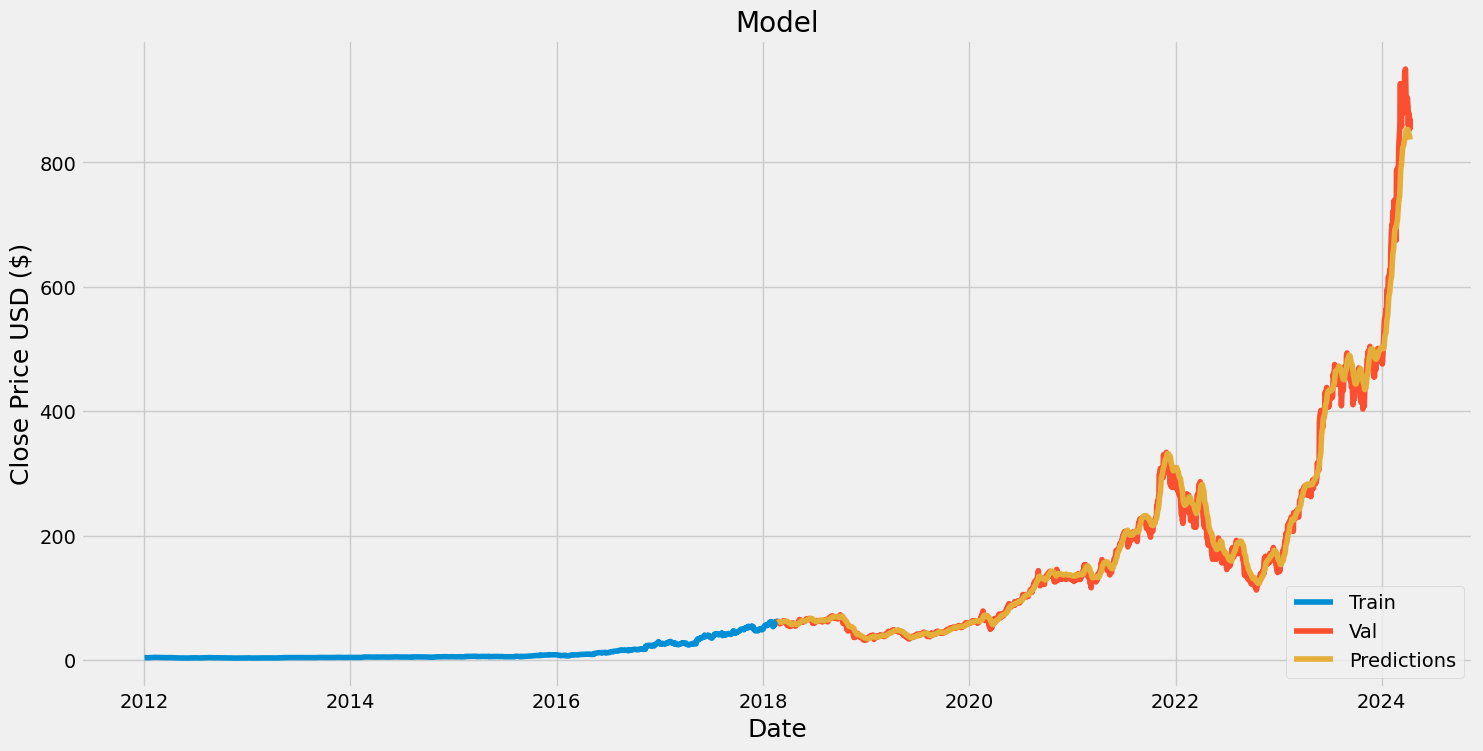

In [ ]:
#Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

#Visualize the data
plt.figure(figsize = (16,8))
plt.title('Model')
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Close Price USD ($)', fontsize = 18)
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Train','Val', 'Predictions' ], loc = 'lower right')
plt.show()

In [ ]:
#Show the valid and predicted prices
valid

,Close,Predictions
Date,,
2018-02-22,60.537498,60.151009
2018-02-23,61.482498,60.449947
2018-02-26,61.645000,60.753174
2018-02-27,61.514999,61.047386
2018-02-28,60.500000,61.303883
...,...,...
2024-04-04,859.049988,850.228943
2024-04-05,880.080017,846.494751
2024-04-08,871.330017,843.575073


In [ ]:
#Get the quote
result = []
apple_quote = pdr.get_data_yahoo('AAPL', start='2019-12-18', end=datetime.today())
apple_quote

[*********************100%%**********************]  1 of 1 completed

1/1 [==============================] - 0s 18ms/step



<ipython-input-22-492a751bd52c>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result.loc[today.date()] = pred_price[0]
<ipython-input-22-492a751bd52c>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result.loc[today.date()] = pred_price[0]
<ipython-input-22-492a751bd52c>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result.loc[today.date()] = pred_price[0]


1/1 [==============================] - 0s 19ms/step


<ipython-input-22-492a751bd52c>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result.loc[today.date()] = pred_price[0]
<ipython-input-22-492a751bd52c>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result.loc[today.date()] = pred_price[0]


1/1 [==============================] - ETA: 0s

<ipython-input-22-492a751bd52c>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result.loc[today.date()] = pred_price[0]


1/1 [==============================] - 0s 20ms/step


<ipython-input-22-492a751bd52c>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result.loc[today.date()] = pred_price[0]
<ipython-input-22-492a751bd52c>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result.loc[today.date()] = pred_price[0]


1/1 [==============================] - 0s 19ms/step


<ipython-input-22-492a751bd52c>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result.loc[today.date()] = pred_price[0]


1/1 [==============================] - 0s 18ms/step


<ipython-input-22-492a751bd52c>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result.loc[today.date()] = pred_price[0]
<ipython-input-22-492a751bd52c>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result.loc[today.date()] = pred_price[0]
<ipython-input-22-492a751bd52c>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result.loc[today.date()] = pred_price[0]


1/1 [==============================] - 0s 19ms/step


<ipython-input-22-492a751bd52c>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result.loc[today.date()] = pred_price[0]


1/1 [==============================] - 0s 18ms/step


<ipython-input-22-492a751bd52c>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result.loc[today.date()] = pred_price[0]
<ipython-input-22-492a751bd52c>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result.loc[today.date()] = pred_price[0]


1/1 [==============================] - 0s 19ms/step


<ipython-input-22-492a751bd52c>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result.loc[today.date()] = pred_price[0]


1/1 [==============================] - 0s 19ms/step


<ipython-input-22-492a751bd52c>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result.loc[today.date()] = pred_price[0]
<ipython-input-22-492a751bd52c>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result.loc[today.date()] = pred_price[0]
<ipython-input-22-492a751bd52c>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result.loc[today.date()] = pred_price[0]


1/1 [==============================] - 0s 19ms/step


<ipython-input-22-492a751bd52c>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result.loc[today.date()] = pred_price[0]
<ipython-input-22-492a751bd52c>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result.loc[today.date()] = pred_price[0]
<ipython-input-22-492a751bd52c>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result.loc[today.date()] = pred_price[0]
<ipython-input-22-492a751bd52c>:31: SettingWithCopyWarning: 
A value i

1/1 [==============================] - ETA: 0s

<ipython-input-22-492a751bd52c>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result.loc[today.date()] = pred_price[0]
<ipython-input-22-492a751bd52c>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result.loc[today.date()] = pred_price[0]
<ipython-input-22-492a751bd52c>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result.loc[today.date()] = pred_price[0]


1/1 [==============================] - 0s 25ms/step


<ipython-input-22-492a751bd52c>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result.loc[today.date()] = pred_price[0]
<ipython-input-22-492a751bd52c>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result.loc[today.date()] = pred_price[0]
<ipython-input-22-492a751bd52c>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result.loc[today.date()] = pred_price[0]


1/1 [==============================] - ETA: 0s

<ipython-input-22-492a751bd52c>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result.loc[today.date()] = pred_price[0]
<ipython-input-22-492a751bd52c>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result.loc[today.date()] = pred_price[0]
<ipython-input-22-492a751bd52c>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result.loc[today.date()] = pred_price[0]


1/1 [==============================] - 0s 19ms/step


<ipython-input-22-492a751bd52c>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result.loc[today.date()] = pred_price[0]
<ipython-input-22-492a751bd52c>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result.loc[today.date()] = pred_price[0]
<ipython-input-22-492a751bd52c>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result.loc[today.date()] = pred_price[0]
<ipython-input-22-492a751bd52c>:31: SettingWithCopyWarning: 
A value i

1/1 [==============================] - 0s 19ms/step


<ipython-input-22-492a751bd52c>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result.loc[today.date()] = pred_price[0]
<ipython-input-22-492a751bd52c>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result.loc[today.date()] = pred_price[0]
<ipython-input-22-492a751bd52c>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result.loc[today.date()] = pred_price[0]
<ipython-input-22-492a751bd52c>:31: SettingWithCopyWarning: 
A value i

1/1 [==============================] - 0s 19ms/step


<ipython-input-22-492a751bd52c>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result.loc[today.date()] = pred_price[0]
<ipython-input-22-492a751bd52c>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result.loc[today.date()] = pred_price[0]
<ipython-input-22-492a751bd52c>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result.loc[today.date()] = pred_price[0]


1/1 [==============================] - 0s 19ms/step


<ipython-input-22-492a751bd52c>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result.loc[today.date()] = pred_price[0]
<ipython-input-22-492a751bd52c>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result.loc[today.date()] = pred_price[0]
<ipython-input-22-492a751bd52c>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result.loc[today.date()] = pred_price[0]


1/1 [==============================] - 0s 21ms/step


<ipython-input-22-492a751bd52c>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result.loc[today.date()] = pred_price[0]
<ipython-input-22-492a751bd52c>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result.loc[today.date()] = pred_price[0]
<ipython-input-22-492a751bd52c>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result.loc[today.date()] = pred_price[0]


1/1 [==============================] - 0s 23ms/step


<ipython-input-22-492a751bd52c>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result.loc[today.date()] = pred_price[0]
<ipython-input-22-492a751bd52c>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result.loc[today.date()] = pred_price[0]
<ipython-input-22-492a751bd52c>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result.loc[today.date()] = pred_price[0]


1/1 [==============================] - ETA: 0s

<ipython-input-22-492a751bd52c>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result.loc[today.date()] = pred_price[0]
<ipython-input-22-492a751bd52c>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result.loc[today.date()] = pred_price[0]
<ipython-input-22-492a751bd52c>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result.loc[today.date()] = pred_price[0]
<ipython-input-22-492a751bd52c>:31: SettingWithCopyWarning: 
A value i

1/1 [==============================] - 0s 19ms/step


<ipython-input-22-492a751bd52c>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result.loc[today.date()] = pred_price[0]
<ipython-input-22-492a751bd52c>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result.loc[today.date()] = pred_price[0]
<ipython-input-22-492a751bd52c>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result.loc[today.date()] = pred_price[0]


1/1 [==============================] - 0s 23ms/step


<ipython-input-22-492a751bd52c>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result.loc[today.date()] = pred_price[0]
<ipython-input-22-492a751bd52c>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result.loc[today.date()] = pred_price[0]
<ipython-input-22-492a751bd52c>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result.loc[today.date()] = pred_price[0]


1/1 [==============================] - 0s 20ms/step


<ipython-input-22-492a751bd52c>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result.loc[today.date()] = pred_price[0]
<ipython-input-22-492a751bd52c>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result.loc[today.date()] = pred_price[0]
<ipython-input-22-492a751bd52c>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result.loc[today.date()] = pred_price[0]


1/1 [==============================] - 0s 22ms/step


<ipython-input-22-492a751bd52c>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result.loc[today.date()] = pred_price[0]
<ipython-input-22-492a751bd52c>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result.loc[today.date()] = pred_price[0]
<ipython-input-22-492a751bd52c>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result.loc[today.date()] = pred_price[0]


1/1 [==============================] - 0s 25ms/step


<ipython-input-22-492a751bd52c>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result.loc[today.date()] = pred_price[0]
<ipython-input-22-492a751bd52c>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result.loc[today.date()] = pred_price[0]
<ipython-input-22-492a751bd52c>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result.loc[today.date()] = pred_price[0]
<ipython-input-22-492a751bd52c>:31: SettingWithCopyWarning: 
A value i

1/1 [==============================] - 0s 19ms/step


<ipython-input-22-492a751bd52c>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result.loc[today.date()] = pred_price[0]
<ipython-input-22-492a751bd52c>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result.loc[today.date()] = pred_price[0]
<ipython-input-22-492a751bd52c>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result.loc[today.date()] = pred_price[0]
<ipython-input-22-492a751bd52c>:31: SettingWithCopyWarning: 
A value i

1/1 [==============================] - 0s 20ms/step


<ipython-input-22-492a751bd52c>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result.loc[today.date()] = pred_price[0]
<ipython-input-22-492a751bd52c>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result.loc[today.date()] = pred_price[0]
<ipython-input-22-492a751bd52c>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result.loc[today.date()] = pred_price[0]
<ipython-input-22-492a751bd52c>:31: SettingWithCopyWarning: 
A value i

1/1 [==============================] - 0s 19ms/step


<ipython-input-22-492a751bd52c>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result.loc[today.date()] = pred_price[0]
<ipython-input-22-492a751bd52c>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result.loc[today.date()] = pred_price[0]
<ipython-input-22-492a751bd52c>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result.loc[today.date()] = pred_price[0]


1/1 [==============================] - 0s 25ms/step


<ipython-input-22-492a751bd52c>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result.loc[today.date()] = pred_price[0]
<ipython-input-22-492a751bd52c>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result.loc[today.date()] = pred_price[0]
<ipython-input-22-492a751bd52c>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result.loc[today.date()] = pred_price[0]
<ipython-input-22-492a751bd52c>:31: SettingWithCopyWarning: 
A value i

1/1 [==============================] - 0s 19ms/step


<ipython-input-22-492a751bd52c>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result.loc[today.date()] = pred_price[0]
<ipython-input-22-492a751bd52c>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result.loc[today.date()] = pred_price[0]
<ipython-input-22-492a751bd52c>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result.loc[today.date()] = pred_price[0]


1/1 [==============================] - ETA: 0s

<ipython-input-22-492a751bd52c>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result.loc[today.date()] = pred_price[0]
<ipython-input-22-492a751bd52c>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result.loc[today.date()] = pred_price[0]
<ipython-input-22-492a751bd52c>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result.loc[today.date()] = pred_price[0]


1/1 [==============================] - 0s 20ms/step


<ipython-input-22-492a751bd52c>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result.loc[today.date()] = pred_price[0]
<ipython-input-22-492a751bd52c>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result.loc[today.date()] = pred_price[0]
<ipython-input-22-492a751bd52c>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result.loc[today.date()] = pred_price[0]


1/1 [==============================] - 0s 20ms/step


<ipython-input-22-492a751bd52c>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result.loc[today.date()] = pred_price[0]
<ipython-input-22-492a751bd52c>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result.loc[today.date()] = pred_price[0]
<ipython-input-22-492a751bd52c>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result.loc[today.date()] = pred_price[0]


1/1 [==============================] - 0s 21ms/step


<ipython-input-22-492a751bd52c>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result.loc[today.date()] = pred_price[0]
<ipython-input-22-492a751bd52c>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


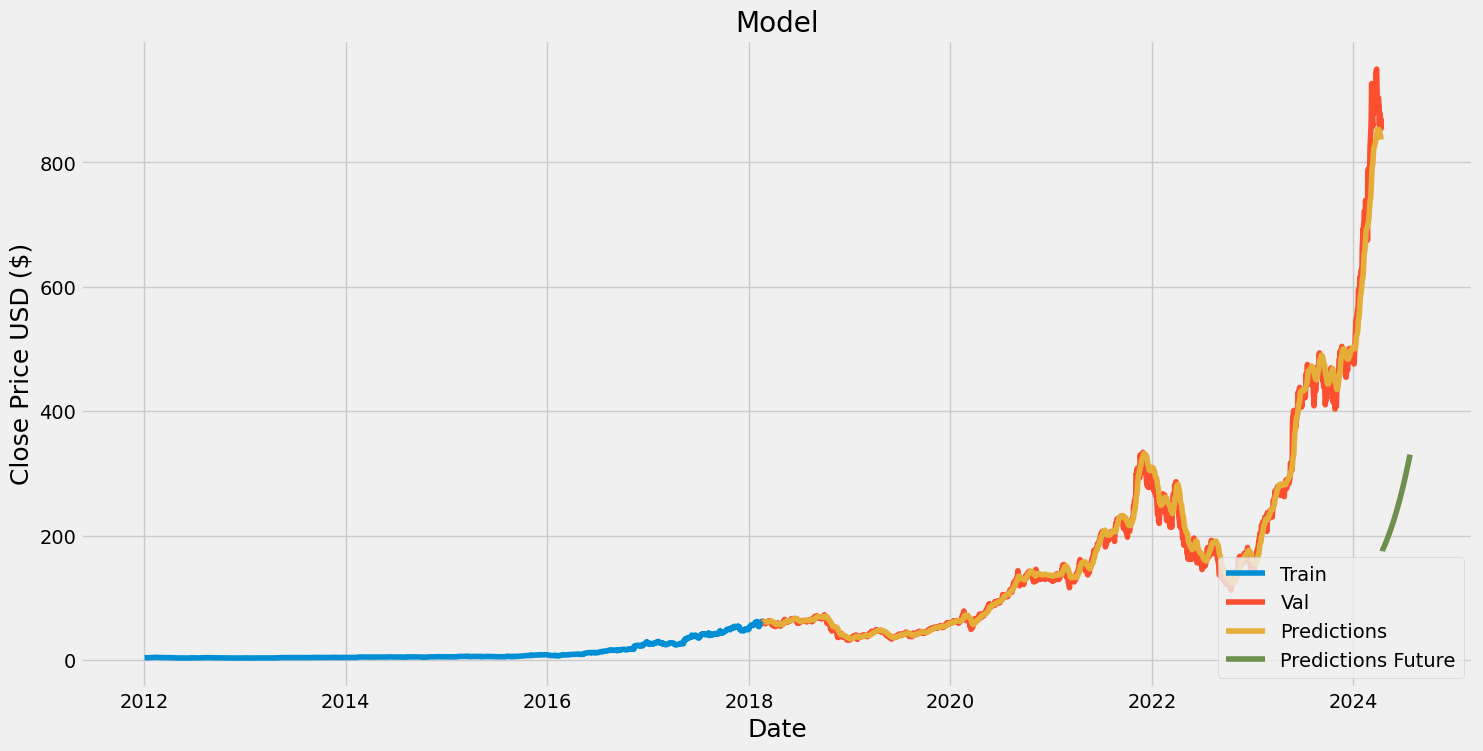

In [ ]:

#Create new df
new_df = apple_quote.filter(['Close'])
new_df
today = datetime.today()

#Get the last 60 days closing price values and convert the df to array
last_60day = new_df[-60:].values

result = new_df[-1:]
#Scales the data 0-1
for i in range(0,100):
  last_60_days_scaled = scaler.transform(last_60day)
  # print(last_60_days_scaled)
  #Create empty list
  X_test = []
  #Append past 60 days
  X_test.append(last_60_days_scaled)
  #Convert the x_test dataset to numpy
  X_test = np.array(X_test)
  #Reshape the data
  X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
  #Get predicted price
  pred_price = model.predict(X_test)
  #Undo the scaling
  pred_price = scaler.inverse_transform(pred_price)
  today = today + timedelta(days=1)
  result.loc[today.date()] = pred_price[0]
  #print(result)
  last_60day=np.append(last_60day, pred_price)
  last_60day=last_60day.reshape(-1,1)
  #print("Append succes",last_60day[-1])
  last_60day = last_60day[-60:]

#Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

#Visualize the data
plt.figure(figsize = (16,8))
plt.title('Model')
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Close Price USD ($)', fontsize = 18)
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])
plt.plot(result)
plt.legend(['Train','Val', 'Predictions','Predictions Future' ], loc = 'lower right')
plt.show()

In [ ]:
#Get the quote
apple_quote2 = pdr.get_data_yahoo('NVDA', start='2023-12-18', end='2023-12-19')
print(apple_quote2['Close'])

[*********************100%%**********************]  1 of 1 completed

Date
2023-12-18    500.769989
Name: Close, dtype: float64
